In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import time
import random
import sys
import salvus.namespace as sn
from classes.poisson import poisson_solver
from salvus.mesh.models_1D import model 
from salvus.mesh import simple_mesh
from salvus.flow import api
import salvus.namespace as sn
import salvus.mesh
from salvus.flow import api, simple_config
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}

matplotlib.rc('font', **font)

In [9]:
buf_noo = {}

In [10]:
for buf in [10]:
    a = poisson_solver(meshfile = '../meshes/gravity/mesh_test.h5')
    a.config.run.tensor_order = 1
    a.config.gravity_run.boundary_condition = "dirichlet"
    with_surf_topo = False
    with_moho_topo = False
    a.construct_mesh(with_surface_topo=with_surf_topo, 
                     with_moho_topo=with_moho_topo,
                     nex = 24, buffer=buf, dr_basis=1.5)
    a.add_oneD_solution(npoints = 100)
    a.prepare_mesh_fields()
    a.write_mesh(path = a.meshfile)
    a.config.run.site_name='daint'
    a.run_simulation()
    buf_noo[str(buf)] = a.compare_solution_with_analytical()

Adding external domain for gravity modelling...
Outer radius (scaled to surface radius) :  30.2851787294
number of elements in the exterior   :  15744
number of elements:  48512
amp 0.149373 0.191065
re 7.76159e-05 0.164535
im -2.69163e-05 0.178175
sea_mask_grad 2.04029 7.00137
attaching elastic parameters

SUCCESSFULLY GENERATED MESH IN 4.09426 SECONDS.
Elemental fields in the mesh:  {'external', 'M0', 'layer', 'fluid', 'M1', 'RHS'}
the mesh size before writing: 14.19 Mb
the mesh has been written to ../meshes/gravity/mesh_test.h5
external boundary condition:  2066546.2011471763


Exception (client): Error reading SSH protocol banner
Traceback (most recent call last):
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2270, in _check_banner
    buf = self.packetizer.readline(timeout)
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/packet.py", line 380, in readline
    buf += self._read_timeout(timeout)
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/packet.py", line 622, in _read_timeout
    raise socket.timeout()
socket.timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2093, in run
    self._check_banner()
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2275, in _check_banner
    "Error reading SSH protoc

SSHException: Error reading SSH protocol banner

In [16]:
mesh                                             = a.mesh
sim                                              = sn.simple_config.simulation.Poisson(mesh=mesh)
sim.domain.polynomial_order                      = mesh.shape_order
sim.physics.poisson_equation.mass_matrix_scaling = False

sim.physics.poisson_equation.right_hand_side.filename = a.meshfile
sim.physics.poisson_equation.right_hand_side.format   = "hdf5"
sim.physics.poisson_equation.right_hand_side.field    = "RHS"

sim.physics.poisson_equation.solution.filename        = os.path.basename(a.config.gravity_run.volume_solution)
sim.physics.poisson_equation.solution.fields          = a.config.gravity_run.volume_solution_fields

bc = a.config.gravity_run.boundary_condition
if bc == 'dirichlet':
    assert hasattr(a, "mesh"),  "There is no mesh in the object. Run 'construct_mesh()' first"
    boundaries = sn.simple_config.boundary.HomogeneousDirichlet(side_sets=["r2"], value=float(a.oneD_solution.grav_pot[-1]))
    print("external boundary condition: ", float(a.oneD_solution.grav_pot[-1]))
    sim.add_boundary_conditions(boundaries)
elif bc == 'dirichlet_zero':
    assert hasattr(a, "mesh"),  "There is no mesh in the object. Run 'construct_mesh()' first"
    boundaries = sn.simple_config.boundary.HomogeneousDirichlet(side_sets=["r2"], value=float(0))
    print("external boundary condition: ", float(0))
    sim.add_boundary_conditions(boundaries)

sim.solver.max_iterations     = a.config.gravity_run.max_iterations
sim.solver.absolute_tolerance = a.config.gravity_run.absolute_tolerance
sim.solver.relative_tolerance = a.config.gravity_run.relative_tolerance
sim.solver.preconditioner     = a.config.gravity_run.preconditioner
sim.validate()

job = 

                input_file    = sim,
                site_name     = a.config.run.site_name,
                ranks         = a.config.run.ranks,
                wall_time_in_seconds = a.config.run.wall_time_in_seconds,)
print("Check status of the job with job.update_status()")

external boundary condition:  2066546.2011471763


Exception (client): Error reading SSH protocol banner
Traceback (most recent call last):
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2270, in _check_banner
    buf = self.packetizer.readline(timeout)
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/packet.py", line 380, in readline
    buf += self._read_timeout(timeout)
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/packet.py", line 622, in _read_timeout
    raise socket.timeout()
socket.timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2093, in run
    self._check_banner()
  File "/home/andreid/soft/miniconda3/envs/salvus/lib/python3.7/site-packages/paramiko/transport.py", line 2275, in _check_banner
    "Error reading SSH protoc

SSHException: Error reading SSH protocol banner

In [1]:
for buf in [1]:
    a = poisson_solver(meshfile = '../meshes/gravity/mesh.h5')
    a.config.run.tensor_order = 4
    a.config.gravity_run.boundary_condition = "dirichlet"
    with_surf_topo = True
    with_moho_topo = True
    a.construct_mesh(with_surface_topo=with_surf_topo, 
                     with_moho_topo=with_moho_topo,
                     nex = 24, buffer=buf, dr_basis=1.5)
    a.add_oneD_solution(npoints = 100)
    a.prepare_mesh_fields()
    a.write_mesh(path = a.meshfile)
    a.run_simulation()
    buf_comp[str(buf)] = a.compare_solution_with_analytical()

NameError: name 'poisson_solver' is not defined

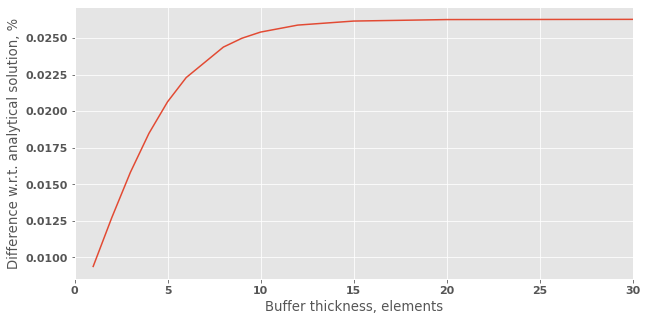

In [40]:
xvect, yvect = list(), list()
keys = np.array(list(buf_comp.keys()),dtype=int)
keys.sort()
for key in keys:
    xvect.append(key)
    yvect.append(buf_comp[str(key)])
fig = plt.figure(figsize=(10,5))
plt.plot(xvect, np.abs(yvect), '-')
plt.xlabel("Buffer thickness, elements")
plt.ylabel("Difference w.r.t. analytical solution, %")
plt.xlim([0,np.max(keys)])
if (with_surf_topo) and (not with_moho_topo):
    plt.savefig("buffer_thickness_topo_nomoho.pdf")
elif (with_surf_topo) and (with_moho_topo):
    plt.savefig("buffer_thickness_topo_moho.pdf")

In [ ]:
buf_comp_nomoho = {}


In [90]:
radii = []
for buf in [ 25]:
    a = poisson_solver(meshfile = '../meshes/gravity/mesh.h5')
    a.config.run.tensor_order = 4
    a.config.gravity_run.boundary_condition = "dirichlet"
    with_surf_topo = True
    with_moho_topo = False
    a.construct_mesh(with_surface_topo=with_surf_topo, 
                     with_moho_topo=with_moho_topo,
                     nex = 24, buffer=buf, dr_basis=1.5)
    radii.append(np.max(np.linalg.norm(a.mesh.points, axis=-1)))
    a.add_oneD_solution(npoints = 100)
    a.prepare_mesh_fields()
    a.write_mesh(path = a.meshfile)
    a.run_simulation()
    buf_comp_nomoho[str(buf)] = a.compare_solution_with_analytical()

Adding external domain for gravity modelling...
Outer radius (scaled to surface radius) :  12916.1184205
number of elements in the exterior   :  21504
number of elements:  54272
amp 0.149373 0.191065
re 7.76159e-05 0.164535
im -2.69163e-05 0.178175
sea_mask_grad 2.04029 7.00137
loading topography data
Using topo variable topography_earth2014_egm2008_lmax_256_lmax_256 in ../topography files/topography_earth2014_egm2008_lmax_256.nc
adding topography
attaching elastic parameters

SUCCESSFULLY GENERATED MESH IN 10.4716 SECONDS.
Elemental fields in the mesh:  {'layer', 'M1', 'RHS', 'external', 'M0', 'fluid'}
the mesh has been written to ../meshes/gravity/mesh.h5
external boundary condition:  -4845.551814940018
Job `job_2201131944098961_1e22af564c` running on `local` with 10 rank(s).
Site information:
  * Salvus version: 0.11.44-31-g3787c0b3
  * Floating point size: 64


Solving linear system:   0%|                               | 0/3000 [00:00<?, ?it/s]

* Downloaded 522.8 MB of results to `../solutions/gravity`.
* Total run time: 134.49 seconds.
* Pure simulation time: 130.64 seconds.
Diff between modelled and analyt potentials: -0.042128557925406984%


In [77]:
np.array(radii, dtype=str)

array(['9927268.11279', '12371220.9075', '16037150.0995', '21536043.8874',
       '29784384.5694', '42156895.5924', '88553811.9286', '130311036.631',
       '192946873.685', '427831262.637', '1431962025.41', '10840733333.8',
       '624845755485.0'],
      dtype='<U32')

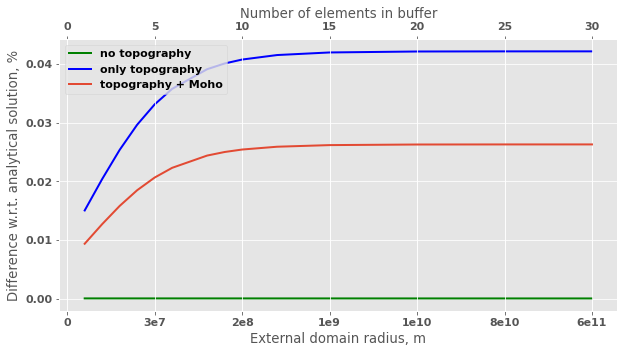

In [138]:
fig, ax1 = plt.subplots(figsize=(10,5))

xvect, yvect = list(), list()
keys = np.array(list(buf_comp_nomoho.keys()),dtype=int)
keys.sort()
for key in keys:
    xvect.append(key)
    yvect.append(buf_comp_nomoho[str(key)])

#ax1.plot(xvect, np.abs(yvect), 'b-', linewidth=2., label="only topography")
l1, = ax1.plot(xvect, np.abs(yvect), 'b-', linewidth=2., label="only topography")
#some silly way of doing things below: (not automatized)
ax1.set_xticks(ticks=[0,5,10,15,20,25,30],labels=['0', '3e7', '2e8', '1e9', '1e10', '8e10','6e11'])
ax1.set_xlabel("External domain radius, m")
ax1.set_ylabel("Difference w.r.t. analytical solution, %")
#ax1.set_xlim([0,np.max(keys)])
#ax1.legend()

xvect, yvect = list(), list()
keys = np.array(list(buf_noo.keys()),dtype=int)
keys.sort()
for key in keys:
    xvect.append(key)
    yvect.append(buf_noo[str(key)])
l2, = ax1.plot([1,30], np.abs(yvect), 'g-', linewidth=2., label="no topography")

ax2 = ax1.twiny()

xvect, yvect = list(), list()
keys = np.array(list(buf_comp.keys()),dtype=int)
keys.sort()
for key in keys:
    xvect.append(key)
    yvect.append(buf_comp[str(key)])
ax2.set_xlabel("Number of elements in buffer")
l3, = ax2.plot(xvect, np.abs(yvect), '-', linewidth=2., label="topography + Moho")
ax2.legend(handles=[l2,l1,l3], loc="upper left")

#ax[1].savefig("buffer_thickness_all.pdf")
fig.savefig("buffer_ext_rad.pdf")

In [134]:
buf_noo

{'1': 7.6901158274878963e-05, '20': 6.9587302928316095e-05}